# Proyecto 1 - Analitica de textos
#### Leonardo Rangel - 202215757
#### Santiago Molina - 202112137
#### François Morales - 202211168


# Caso
El Fondo de Poblaciones de las Naciones Unidas (UNFPA1) junto con entidades públicas y
haciendo uso de diferentes herramientas de participación ciudadana, busca identificar
problemas y evaluar soluciones actuales, relacionando la información dada por los
ciudadanos con los diferentes Objetivos de Desarrollo Sostenible (ODS). Los ODS fueron
adoptados por las Naciones Unidas en 2015 como un llamamiento universal para poner fin
a la pobreza, proteger el planeta y garantizar que para el 2030 todas las personas disfruten
de paz y prosperidad2
.
En este contexto, uno de los procesos que requiere mayor esfuerzo es el análisis de la
información textual recopilada, ya que consume muchos recursos, que incluyen la
participación de un experto. Es así como el UNFPA quiere desarrollar un proyecto con
ustedes, donde el objetivo principal es relacionar de forma automática opiniones de los
ciudadanos con los ODS 3, 4 y 5. A nivel de la solución a plantear deben aplicar la
metodología de desarrollo de aplicaciones analíticas para crear un modelo analítico que sea
utilizado y reentrenado por medio de una aplicación web o móvil a partir de un conjunto de
opiniones que contienen texto en lenguaje natural.



# Enfoque analitico:

El enfoque analitico se encuentra anexo en el documento


#1. Instalación e importacion de librerias

In [4]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions
!pip install ydata-profiling
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
# Manejo de gráficas
!pip install scikit-plot
!python -m spacy download es_core_news_sm
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
import spacy
from nltk.stem.snowball import SnowballStemmer
# Punkt permite separar un texto en frases.
nltk.download('punkt')
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3a24723b4800f039fb0b915cb76e798d62affe847a754d7a3580d2630f60c56c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 78.6 MB/s eta 0:00:00
✔ Download and installation succ

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.7 MB/s eta 0:00:00


# 2. Perfilamiento y entendimineto de los datos

## Lectura de los datos

In [5]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_excel('ODScat_345.xlsx')

data_t, data_v = train_test_split(data, test_size=0.2, random_state=0)

In [6]:
data_t

,Textos_espanol,sdg
2651,La movilización de las mujeres en manifestacio...,5
169,El papel combinado como comprador y proveedor ...,3
2993,El desempleo es particularmente alto entre los...,5
1148,"Además, el espíritu empresarial es un vehículo...",4
2270,Aunque Sudáfrica tenía una Oficina de la Condi...,5
...,...,...
835,La Compensación por enfermedad se otorga a adu...,3
3264,"En este documento, esta cobertura se considera...",3
1653,El objetivo del análisis será identificar los ...,4
2607,"A la luz de esto, la aplicación de un enfoque ...",5


In [7]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3239 entries, 2651 to 2732
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  3239 non-null   object
 1   sdg             3239 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 75.9+ KB


## Entendimiento de los datos

Para entender los mensajes, se realizan 'estadísticas descriptivas' para poder obtener un análisis de los textos.


In [8]:
data_t.shape

(3239, 2)

In [9]:
from scipy import stats as st

textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [st.mode([len(x) for x in i.split(' ')], keepdims=True)[0][0] for i in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

textos


,Textos_espanol,sdg,Conteo,Moda,Max,Min
2651,La movilización de las mujeres en manifestacio...,5,732,2,15,1
169,El papel combinado como comprador y proveedor ...,3,869,2,14,1
2993,El desempleo es particularmente alto entre los...,5,637,2,15,1
1148,"Además, el espíritu empresarial es un vehículo...",4,482,2,13,1
2270,Aunque Sudáfrica tenía una Oficina de la Condi...,5,667,2,14,1
...,...,...,...,...,...,...
835,La Compensación por enfermedad se otorga a adu...,3,894,2,19,1
3264,"En este documento, esta cobertura se considera...",3,543,2,13,1
1653,El objetivo del análisis será identificar los ...,4,1003,2,14,1
2607,"A la luz de esto, la aplicación de un enfoque ...",5,813,2,14,1


In [10]:
textos.describe()

,sdg,Conteo,Moda,Max,Min
count,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000
mean,4.062056,699.932078,2.095400,15.333128,0.967274
std,0.812679,228.265702,0.475957,4.078732,0.206840
min,3.000000,294.000000,1.000000,9.000000,0.000000
25%,3.000000,532.500000,2.000000,14.000000,1.000000
50%,4.000000,657.000000,2.000000,15.000000,1.000000
75%,5.000000,827.000000,2.000000,16.000000,1.000000
max,5.000000,1513.000000,10.000000,83.000000,2.000000


## Perfilamiento de los datos

In [11]:
from ydata_profiling import ProfileReport
# Se realiza un perfilamiento de los datos con la librería pandas profiling

perfil = ProfileReport(data_t, title="Perfilamiento de Datos", explorative=True)
perfil.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Estadisticas generales:

- Número de variables: 2
- Número de observaciones: 3,239

Tipos de variables:
- Textos español: Variable de tipo texto
- sdg: Variable categórica (valores entre 3 y 5 representando sus respectivos ODS)

Variable textos español:
- 3,239 (100% de los valores son únicos)

Variable sdg:
- 3 valores distintos

Distribución de valores:
- Valor 5: 1,176 ocurrencias
- Valor 4: 1,088 ocurrencias
- Valor 3: 975 ocurrencias
<br>
<br>

Observaciones:

1. Diversidad de contenido textual:
  - La variable Textos_espanol contiene textos altamente diversos, ya que todos los valores son distintos, lo que podría dificultar su análisis en términos de identificación de patrones repetidos.

2. Distribución sdg:
  - a variable categórica sdg sigue la siguiente distribución, el valor 5 es el más frecuente (aproximadamente el 36.3% de las observaciones), seguido por el valor 4 (33.6%) y el valor 3 (30.1%). Esto puede influir en la interpretación de los modelos predictivos, ya que los resultados podrían estar sesgados hacia las clases más frecuentes.

3. Balance de clases:
  - La variable categórica sdg no está completamente balanceada, pero las proporciones entre los diferentes valores no son extremadamente desiguales. Esto podría facilitar el entrenamiento de modelos predictivos sin necesidad de aplicar técnicas de balanceo.

## Analisis de calidad de los datos


### Completitud

Se evidencia que los datos tienen un 100% de completitud

In [12]:
datos_completos = data_t.notnull().sum()
print(datos_completos)

Textos_espanol    3239
sdg               3239
dtype: int64


### Unicidad

Se evidencia que todos los datos son cimpletamente unicos, no hay duplicados.

In [13]:
duplicados = data.duplicated().sum()
print(duplicados)

0


### Consistencia

Comprobamos que no existen valores fuera de los rangos 3 a 5 en la columna de sdg correspondiente a los ODS

In [14]:
valores_fuera_rango = data[~data['sdg'].between(3, 5)]
print(valores_fuera_rango)
print("numero de registros fuera de los rangos: " + str(len(valores_fuera_rango)))

Empty DataFrame
Columns: [Textos_espanol, sdg]
Index: []
numero de registros fuera de los rangos: 0


# 3. Preparacion de los datos

Para poder realizar el pre-procesamiento de los datos, realizamos las siguientes tres etapas:

- Limpieza de los datos.
- Tokenización.
- Normalización.
- Selección de campos.

## 3.1 Limpieza de los datos

Para la fase de limpieza de datos, se implementaron varios procesos que permiten mejorar la calidad del texto antes de su análisis. En primer lugar, se eliminaron los caracteres no ASCII para asegurar que el texto esté en un formato estándar compatible con los procesos de análisis. Luego, se convirtió todo el texto a minúsculas para evitar problemas derivados de la diferenciación entre mayúsculas y minúsculas. También se eliminaron los signos de puntuación y se reemplazaron los números por su representación textual, mejorando así la consistencia de los datos. Finalmente, se eliminaron las palabras vacías o stopwords en español, con el objetivo de reducir el ruido y mantener solo las palabras relevantes para el análisis. Estos pasos en conjunto ayudan a preparar los datos de manera óptima para su posterior procesamiento y modelado.

In [15]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
      n1word = word.lower()
      new_words.append(n1word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
   """Replace all interger occurrences in list of tokenized words with textual representation"""
   p = inflect.engine()
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = p.number_to_words(word)
           new_words.append(new_word)
       else:
           new_words.append(word)
   return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stop_words = set(stopwords.words('spanish'))
    new_words = [word for word in words if word not in stop_words]
    return new_words

def preprocessing(words):
    words = remove_punctuation(words)
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

## 3.2 Tokenización

La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos.

In [16]:
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [17]:
data_t['words'] = data_t['Textos_espanol'].apply(word_tokenize)
data_t.head()

,Textos_espanol,sdg,words
2651,La movilización de las mujeres en manifestacio...,5,"[La, movilización, de, las, mujeres, en, manif..."
169,El papel combinado como comprador y proveedor ...,3,"[El, papel, combinado, como, comprador, y, pro..."
2993,El desempleo es particularmente alto entre los...,5,"[El, desempleo, es, particularmente, alto, ent..."
1148,"Además, el espíritu empresarial es un vehículo...",4,"[Además, ,, el, espíritu, empresarial, es, un,..."
2270,Aunque Sudáfrica tenía una Oficina de la Condi...,5,"[Aunque, Sudáfrica, tenía, una, Oficina, de, l..."


In [18]:
data_t['words'].info()

<class 'pandas.core.series.Series'>
Index: 3239 entries, 2651 to 2732
Series name: words
Non-Null Count  Dtype 
--------------  ----- 
3239 non-null   object
dtypes: object(1)
memory usage: 50.6+ KB


In [19]:
data_t['words1']=data_t['words'].apply(preprocessing) #Aplica la eliminación del ruido

data_t.head()

,Textos_espanol,sdg,words,words1
2651,La movilización de las mujeres en manifestacio...,5,"[La, movilización, de, las, mujeres, en, manif...","[movilizacion, mujeres, manifestaciones, calle..."
169,El papel combinado como comprador y proveedor ...,3,"[El, papel, combinado, como, comprador, y, pro...","[papel, combinado, comprador, proveedor, nivel..."
2993,El desempleo es particularmente alto entre los...,5,"[El, desempleo, es, particularmente, alto, ent...","[desempleo, particularmente, alto, jovenes, on..."
1148,"Además, el espíritu empresarial es un vehículo...",4,"[Además, ,, el, espíritu, empresarial, es, un,...","[ademas, espiritu, empresarial, vehiculo, fund..."
2270,Aunque Sudáfrica tenía una Oficina de la Condi...,5,"[Aunque, Sudáfrica, tenía, una, Oficina, de, l...","[aunque, sudafrica, tenia, oficina, condicion,..."


## 3.3 Normalización

En la normalización de los datos se realiza la eliminación de prefijos y sufijos, además de realizar una lemmatización.

In [20]:
nlp = spacy.load('es_core_news_sm')

# Inicializamos el Stemmer para español
stemmer = SnowballStemmer("spanish")

def stem_words(words):
    """Stem words in list of tokenized words"""
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    """Apply stemming and lemmatization to words"""
    #stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return lemmas

In [21]:
data_t['words1'] = data_t['words1'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t.head()

,Textos_espanol,sdg,words,words1
2651,La movilización de las mujeres en manifestacio...,5,"[La, movilización, de, las, mujeres, en, manif...","[movilizacion, mujeres, manifestaciones, calle..."
169,El papel combinado como comprador y proveedor ...,3,"[El, papel, combinado, como, comprador, y, pro...","[papel, combinado, comprador, proveedor, nivel..."
2993,El desempleo es particularmente alto entre los...,5,"[El, desempleo, es, particularmente, alto, ent...","[desempleo, particularmente, alto, jovenes, on..."
1148,"Además, el espíritu empresarial es un vehículo...",4,"[Además, ,, el, espíritu, empresarial, es, un,...","[ademas, espiritu, empresarial, vehiculo, fund..."
2270,Aunque Sudáfrica tenía una Oficina de la Condi...,5,"[Aunque, Sudáfrica, tenía, una, Oficina, de, l...","[aunque, sudafrica, tenia, oficina, condicion,..."


## 3.4 Selección de campos

Primero, se separa la variable predictora y los textos que se van a utilizar.

In [22]:
data_t['words2'] = data_t['words1'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Textos_espanol,sdg,words,words1,words2
2651,La movilización de las mujeres en manifestacio...,5,"[La, movilización, de, las, mujeres, en, manif...","[movilizacion, mujeres, manifestaciones, calle...",movilizacion mujeres manifestaciones callejera...
169,El papel combinado como comprador y proveedor ...,3,"[El, papel, combinado, como, comprador, y, pro...","[papel, combinado, comprador, proveedor, nivel...",papel combinado comprador proveedor nivel muni...
2993,El desempleo es particularmente alto entre los...,5,"[El, desempleo, es, particularmente, alto, ent...","[desempleo, particularmente, alto, jovenes, on...",desempleo particularmente alto jovenes one tho...
1148,"Además, el espíritu empresarial es un vehículo...",4,"[Además, ,, el, espíritu, empresarial, es, un,...","[ademas, espiritu, empresarial, vehiculo, fund...",ademas espiritu empresarial vehiculo fundament...
2270,Aunque Sudáfrica tenía una Oficina de la Condi...,5,"[Aunque, Sudáfrica, tenía, una, Oficina, de, l...","[aunque, sudafrica, tenia, oficina, condicion,...",aunque sudafrica tenia oficina condicion jurid...
...,...,...,...,...,...
835,La Compensación por enfermedad se otorga a adu...,3,"[La, Compensación, por, enfermedad, se, otorga...","[compensacion, enfermedad, otorga, adultos, th...",compensacion enfermedad otorga adultos thirty ...
3264,"En este documento, esta cobertura se considera...",3,"[En, este, documento, ,, esta, cobertura, se, ...","[documento, cobertura, considera, fuente, secu...",documento cobertura considera fuente secundari...
1653,El objetivo del análisis será identificar los ...,4,"[El, objetivo, del, análisis, será, identifica...","[objetivo, analisis, sera, identificar, puntos...",objetivo analisis sera identificar puntos comu...
2607,"A la luz de esto, la aplicación de un enfoque ...",5,"[A, la, luz, de, esto, ,, la, aplicación, de, ...","[luz, aplicacion, enfoque, lente, genero, poli...",luz aplicacion enfoque lente genero politicas ...


##Separacion de datos

In [23]:
X_data, y_data = data_t['words2'],data_t['sdg']
y_data

,sdg
2651,5
169,3
2993,5
1148,4
2270,5
...,...
835,3
3264,3
1653,4
2607,5


In [24]:

count = CountVectorizer() #contador
print(X_data)


X_count = count.fit_transform(X_data)


nombre_columnas = count.get_feature_names_out()

2651    movilizacion mujeres manifestaciones callejera...
169     papel combinado comprador proveedor nivel muni...
2993    desempleo particularmente alto jovenes one tho...
1148    ademas espiritu empresarial vehiculo fundament...
2270    aunque sudafrica tenia oficina condicion jurid...
                              ...                        
835     compensacion enfermedad otorga adultos thirty ...
3264    documento cobertura considera fuente secundari...
1653    objetivo analisis sera identificar puntos comu...
2607    luz aplicacion enfoque lente genero politicas ...
2732    examinamos resultados ols todas mujeres juntas...
Name: words2, Length: 3239, dtype: object


##Exportación de los documentos csv separados por x, Textos_espanol y Y, sdg.

In [25]:
data_x = pd.DataFrame(X_count.toarray(), columns=nombre_columnas)
data_x.shape

(3239, 17899)

In [26]:
palabrasRelevantes = []

for nombre in nombre_columnas:

    dato = (data_x[nombre] != 0).sum()

    if dato > 1:
        palabrasRelevantes.append(nombre)

len(palabrasRelevantes)


9245

In [27]:
data_x2 = data_x[palabrasRelevantes].copy()
data_x2.to_csv('./entrenadoX.csv', index=False)

In [28]:
data_y = pd.DataFrame({'sdg': y_data})

data_y.to_csv('./entrenadoY.csv', index=False)

In [29]:
#copiamos los datos del split que hicimos al comienzo
datos_procesados = data_v.copy()

#desde aca comenzamos a aplicarle la preparacion a los datos
datos_procesados['Textos_espanol'] = datos_procesados['Textos_espanol'].apply(contractions.fix)

#aca tokenizamos las palabras
datos_procesados['words'] = datos_procesados['Textos_espanol'].apply(word_tokenize)
# y aca hacemos el procesado
datos_procesados['words1']=datos_procesados['words'].apply(preprocessing)
#aca los volvemos strin(es lo mismo que words 2)
datos_procesados['words1'] = datos_procesados['words1'].apply(lambda x: ' '.join(map(str, x)))
X_data_v, y_data_v = datos_procesados['words1'],datos_procesados['sdg']

In [30]:
X_v_count = count.transform(X_data_v)
X_v_count.shape

(810, 17899)

In [31]:
data_x_val = pd.DataFrame(X_v_count.toarray(), columns=nombre_columnas)


data_x_val_v1 = data_x_val[palabrasRelevantes].copy()

In [32]:
data_y_val = pd.DataFrame({'sdg': y_data_v})
data_y_val.to_csv('ValidacionY.csv', index=False)


data_x_val_v1.to_csv('ValidacionX.csv', index=False)

In [33]:
sinEtiquetas = pd.read_excel('TestODScat_345.xlsx')
datos_procesados2 = sinEtiquetas.copy()

#desde aca comenzamos a aplicarle la preparacion a los datos
datos_procesados2['Textos_espanol'] = datos_procesados2['Textos_espanol'].apply(contractions.fix)

#aca tokenizamos las palabras
datos_procesados2['words'] = datos_procesados2['Textos_espanol'].apply(word_tokenize)
# y aca hacemos el procesado
datos_procesados2['words1']=datos_procesados2['words'].apply(preprocessing)
#aca los volvemos strin(es lo mismo que words 2)
datos_procesados2['words1'] = datos_procesados2['words1'].apply(lambda x: ' '.join(map(str, x)))
X_data_sinEtiqueta = datos_procesados2['words1']

In [34]:
X_sinEtiqueta = count.transform(X_data_sinEtiqueta)
X_sinEtiqueta.shape

(702, 17899)

In [35]:

x_sinEtiquetaExp = pd.DataFrame(X_sinEtiqueta.toarray(), columns=nombre_columnas)


endSinEtiqueta = x_sinEtiquetaExp[palabrasRelevantes].copy()

endSinEtiqueta.to_csv('SinEtiqueta.csv', index=False)

# Algoritmo 1 - Naive Bayes

François Morales - 202211168

<br>

Naive Bayes es un algortimo de aprendizaje supervisado popular, el cual aplica el teorema de Bayes con la suposición ingenua de las probabilidades de las caracteristicas para un conjunto de datos.


<br>

La probabilidad de que ocurra una clase (C) para un conjunto dado de caracteristicas (X) se calcula de la siguiente manera:

<br>

$$
P(C|X) = \frac{P(C) \cdot P(X|C)}{P(X)}
$$
<br>
<br>
$$
Posterior = \frac{Previo \cdot Probabilidad}{Evidencia}
$$
<br>
<br>
Donde:
<br>
P(C|X) es la posterior, la probabilidad de la clase (C) dadas las caracteristicas (X)
<br>
<br>
P(C) es el anterior, la probabilidad de clase (C)
<br>
<br>
P(X|C) es la probabilidad de caracteristicas (X) para una clase dada (C)
<br>
<br>
P(X) es la probabilidad previa de caracteristicas (X)



## Construcción del modelo

La construcción del modelo se llevó a cabo en dos fases principales. En la primera iteración, se desarrolló un modelo base utilizando Naive Bayes sin realizar ningún ajuste en los hiperparámetros. Este enfoque inicial permitió obtener un conjunto de resultados que sirvieron como referencia para evaluar el rendimiento del modelo en su estado más simple. Posteriormente, en la segunda iteración, se implementó un proceso de ajuste de hiperparámetros con el fin de optimizar el modelo y mejorar su precisión. El objetivo era identificar posibles mejoras en el rendimiento del modelo ajustado en comparación con el modelo base inicial, evaluando si los cambios en los hiperparámetros lograban un aumento en la capacidad predictiva del modelo.

## Primer modelo sin ajuste de hiperparametros


In [36]:
#Importacion de paquetes importantes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#Creación del modelo basado en Naive Bayes Multinomial
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#Entrenando el modelo con los datos de entrenamiento
model.fit(X_data, y_data)

#Creando labels para los datos de testeo
labels = model.predict(data_v['Textos_espanol'])
labels2 = model.predict(X_data)

## Metricas de calidad

In [37]:
print(classification_report(data_v['sdg'], labels))

              precision    recall  f1-score   support

           3       1.00      0.93      0.96       269
           4       0.95      0.97      0.96       266
           5       0.92      0.97      0.95       275

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



## Matriz de confusión y heat map

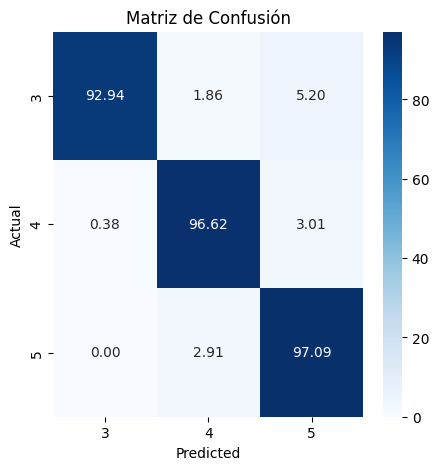

In [38]:
import seaborn as sns
# Crear la matriz de confusión
mat = confusion_matrix(data_v['sdg'], labels)

# Visualizar la matriz de confusión como porcentajes
mat_percentage = mat / mat.sum(axis=1, keepdims=True) * 100

# Crear el heatmap
plt.figure(figsize=(5, 5))  # Ajustar el tamaño de la figura si es necesario
sns.heatmap(mat_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matriz de Confusión')
plt.show()


## Exactitud en train y test

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

print('Exactitud train: %.4f' % accuracy_score(y_data, labels2))
print('Exactitud test: %.4f' % accuracy_score(data_v['sdg'], labels))

Exactitud train: 0.9880
Exactitud test: 0.9556


## Modelo con ajuste de hiperparametros utilizando GridSearch

In [40]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definicion de hiperparametros
param_grid = {'nb__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]}

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=5)

grid_search.fit(X_data, y_data)

y_pred = grid_search.best_estimator_.predict(data_v['Textos_espanol'])
y_pred2 = grid_search.best_estimator_.predict(X_data)

print("Mejor hiperparámetro:", grid_search.best_params_)
print("Mejor puntaje F1:", grid_search.best_score_)


Mejor hiperparámetro: {'nb__alpha': 0.5}
Mejor puntaje F1: 0.9674537139529026


## Metricas de calidad con ajuste de hiperparametros

In [41]:
print(classification_report(data_v['sdg'], y_pred))

              precision    recall  f1-score   support

           3       1.00      0.94      0.97       269
           4       0.96      0.97      0.96       266
           5       0.93      0.97      0.95       275

    accuracy                           0.96       810
   macro avg       0.96      0.96      0.96       810
weighted avg       0.96      0.96      0.96       810



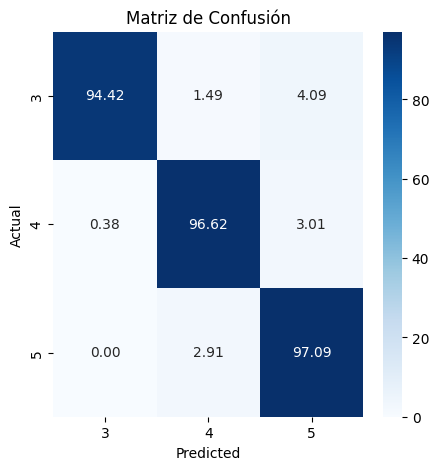

In [42]:
import seaborn as sns
# Crear la matriz de confusión
mat = confusion_matrix(data_v['sdg'], y_pred)

# Visualizar la matriz de confusión como porcentajes
mat_percentage = mat / mat.sum(axis=1, keepdims=True) * 100

# Crear el heatmap
plt.figure(figsize=(5, 5))  # Ajustar el tamaño de la figura si es necesario
sns.heatmap(mat_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matriz de Confusión')
plt.show()

Exactitud en train y test con ajuste de hiperparametros

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

print('Exactitud train: %.4f' % accuracy_score(y_data, y_pred2))
print('Exactitud test: %.4f' % accuracy_score(data_v['sdg'], y_pred))

Exactitud train: 0.9932
Exactitud test: 0.9605


#Algoritmo 2 - Linear Discriminant Analysis

Santiago Molina -202112137

El Linear Discriminant Analysis (LDA) es un algoritmo de clasificación supervisada que se utiliza principalmente para separar clases linealmente. LDA crea un único espacio proyectado, donde busca maximizar la separación entre las clases.

##Proceso básico del LDA:
* **Preprocesamiento:** Los datos son transformados a un espacio donde las clases se separan lo mejor posible.

* **Proyección:** El LDA encuentra una combinación lineal de las
características que maximiza la variabilidad entre clases y minimiza la variabilidad dentro de cada clase.

* **Clasificación:** Los datos son proyectados en este nuevo espacio, y se asignan a la clase más cercana usando una función de distancia.

##Características clave del LDA:
Busca una proyección óptima del espacio de características.

Se suele utilizar para problemas de clasificación con dos o más clases.
La clasificación final se basa en encontrar la clase con mayor probabilidad en el espacio proyectado.

##Construcción del modelo
El entrenamiento del modelo LDA consiste en ajustar el modelo utilizando los datos de entrenamiento para aprender la proyección óptima que maximiza la separabilidad entre las clases. En este caso, clasificamos los textos en función de los ODS (3, 4 y 5).

In [44]:
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [53]:

class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('lda', LinearDiscriminantAnalysis())
])


pipeline.fit(X_data, y_data)


y_pred = pipeline.predict(data_v['Textos_espanol'])


y_pred2 = pipeline.predict(X_data)


print("Reporte de clasificación en conjunto de validación:")
print(classification_report(y_data, y_pred2))



print(f"Exactitud en entrenamiento: {accuracy_score(y_data, y_pred2):.2f}")


Reporte de clasificación en conjunto de validación:
              precision    recall  f1-score   support

           3       0.90      0.88      0.89       975
           4       0.89      0.88      0.89      1088
           5       0.88      0.91      0.89      1176

    accuracy                           0.89      3239
   macro avg       0.89      0.89      0.89      3239
weighted avg       0.89      0.89      0.89      3239

Exactitud en entrenamiento: 0.89


## Metricas de calidad test

In [47]:
print(classification_report(data_v['sdg'], y_pred))
print(f"Exactitud en prueba: {accuracy_score(data_v['sdg'], y_pred):.2f}")

              precision    recall  f1-score   support

           3       0.78      0.65      0.71       269
           4       0.71      0.79      0.75       266
           5       0.74      0.79      0.76       275

    accuracy                           0.74       810
   macro avg       0.75      0.74      0.74       810
weighted avg       0.75      0.74      0.74       810

Exactitud en prueba: 0.74


## Matriz de confusión y heat map

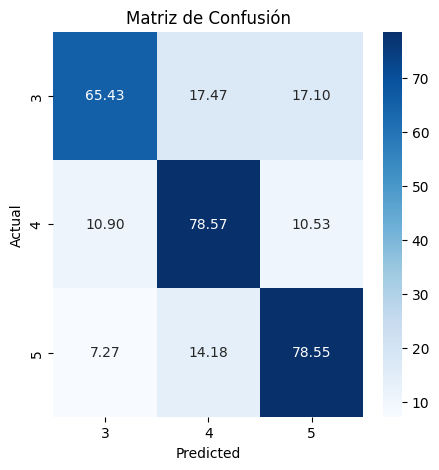

In [52]:
import seaborn as sns
# Crear la matriz de confusión
mat = confusion_matrix(data_v['sdg'], y_pred)

# Visualizar la matriz de confusión como porcentajes
mat_percentage = mat / mat.sum(axis=1, keepdims=True) * 100

# Crear el heatmap
plt.figure(figsize=(5, 5))  # Ajustar el tamaño de la figura si es necesario
sns.heatmap(mat_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=[3,4,5], yticklabels=[3,4,5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Matriz de Confusión')
plt.show()

# Algoritmo 3 - Random Forest

Leonardo Rangel

La solución del modelo implementando el algoritmo de random forest se encuentra en el otro NoteBook anexo a este repositorio, esto se hizo así debido a que este toma un tiempo un poco más largo de ejecución que los demás



# Analisis de Resultados


##1.   Algoritmo Naive Bayes:


*   Exactitud (Train): 99.3%
*   Exactitud (Test): 99.6%
*   Precisión : 96%
*   Recall : 96%
*   F1- Score: 96%

El algoritmo Naive Bayes muestra un excelente desempeño en el conjunto de entrenamiento con una exactitud de 99.3%. Su exactitud en el conjunto de prueba también es alta, alcanzando un 96.0%. Las métricas de precisión, recall y F1-score están equilibradas en 0.96, lo que indica que el modelo tiene una capacidad robusta para clasificar correctamente los textos en relación con los ODS y que su rendimiento es consistente tanto en los datos de entrenamiento como en los de prueba.

##2.   Algoritmo LDA

*   Exactitud (Train): 89%
*   Exactitud (Test): 74%
*   Precisión : 75%
*   Recall : 74%
*   F1- Score: 74%

El algoritmo LDA muestra una exactitud en el conjunto de entrenamiento de 89%, pero su desempeño en el conjunto de prueba es notablemente menor, con una exactitud de 74%. Las métricas de precisión, recall y F1-score son relativamente bajas (0.75, 0.74 y 0.74, respectivamente), sugiriendo que, aunque el modelo tiene un buen desempeño en el entrenamiento, su capacidad para generalizar en datos nuevos es limitada. Esto puede deberse a un sobreajuste o a una incapacidad del modelo para capturar las complejidades de los datos en el conjunto de prueba.
##2.   Algoritmo Random Forest

*   Exactitud (Train): 100%
*   Exactitud (Test): 97%
*   Precisión : 97%
*   Recall : 97%
*   F1- Score: 97%

El algoritmo Random Forest muestra un desempeño sobresaliente, con una exactitud perfecta en el conjunto de entrenamiento y una alta exactitud del 97% en el conjunto de prueba. Las métricas de precisión, recall y F1-score son todas 0.97, lo que indica un rendimiento consistente y preciso en la clasificación de textos relacionados con los ODS. Este modelo parece ser el más robusto y generalizable, capaz de manejar la complejidad de los datos y ofrecer una clasificación confiable.

##Conclusión
 El algoritmo Random Forest es el mejor en términos de rendimiento general, con alta exactitud, precisión, recall y F1-score tanto en los datos de entrenamiento como en los de prueba. Naive Bayes también muestra un buen desempeño, aunque con una ligera disminución en la exactitud en el conjunto de prueba. El LDA, por otro lado, tiene un rendimiento inferior en comparación con los otros dos algoritmos, especialmente en el conjunto de prueba, lo que sugiere que podría no ser la mejor opción para este conjunto de datos específico.


# Analisis de palabras identificadas para el relacionamiento con los ODS

Este analisis se encuentra en el segundo NoteBook adjunto, ya que, se realizó utilizando el algoritmo de random forest el cual fue nuestro mejor modelo

# Mapa de actores
El mapa de actores se encuentra anexo en el documento del proyecto

# Trabajo en Equipo - División de roles y tareas

Leonardo Rangel:
- **Roles:**
  - **Lider de proyecto:** A cargo de la gestión del proyecto. Define las fechas
de reuniones, pre-entregables del grupo y verifica las asignaciones de tareas
para que la carga sea equitativa. Es el encargado de subir la entrega del grupo.
  - **Lider de negocio:**  Es responsable de velar por resolver el problema y estar alineado con la estrategia del negocio para
el cual se plantea el proyecto. Encargado de garantizar que el producto se puede
comunicar de forma apropiada.
- **Tareas:**
  - Realización del enfoque analitico, entendimineto, perfilamiento y calidad de los datos, preparación y limpieza a la para con los demás miembros del grupo
  - Implementación del modelo utilizando Random Forest
  - Analisis de resultados y mapa de actores a la par con los demás miembros del grupo
  - Presentación al negocio
- **Algoritmo:** Random Forest
- **Retos:**
- **Puntos:** 33,33 puntos
- **Horas trabajadas en el proyecto:** 15
<br>
<br>

Santiago Molina:
- **Roles:**
  - **Líder de datos:** Se encarga de gestionar los datos que se van a usar en el
proyecto y de las asignaciones de tareas sobre datos. Dejandolos
disponibles para todo el grupo y garantizando la entrega en el repositorio de
git.
- **Tareas:**
  - Realización del enfoque analitico, entendimineto, perfilamiento y calidad de los datos, preparación y limpieza a la para con los demás miembros del grupo
  - Implementación del modelo utilizando
  - Analisis de resultados y mapa de actores a la par con los demás miembros del grupo
  - Presentación al negocio
- **Algoritmo:**
- **Retos:** Se me dificultó mucho el hecho de vectorizar los datos para poder aplicar el algoritmo.
- **Puntos:** 33,33 puntos
- **Horas trabajadas en el proyecto:** 15
<br>
<br>

François Morales:
- **Roles:**
  - **Líder de analítica:** Se encarga de gestionar las tareas de analítica del grupo.
Se encarga de verificar que los entregables cumplen con los estándares de
análisis y que se tiene el “mejor modelo” según las restricciones existentes.
- **Tareas:**
  - Realización del enfoque analitico, entendimineto, perfilamiento y calidad de los datos, preparación y limpieza a la para con los demás miembros del grupo
  - Implementación del modelo utilizando Niave Bayes
  - Analisis de resultados y mapa de actores a la par con los demás miembros del grupo
  - Presentación al negocio
- **Algoritmo:** Naive Bayes
- **Retos:** Uno de los mayores retos durante la realización del modelo fue encontrar los hiperparámetros adecuados que permitieran mejorar el desempeño del modelo. Este proceso fue algo complicado ya que no existe una fórmula única para determinar los mejores valores, sino que depende del tipo de datos y de las características del modelo.

  Para superar este reto, realicé una investigación acerca de las mejores prácticas para ajustar hiperparámetros en modelos Naive Bayes. Consulté diversas fuentes e investigué enfoques como la búsqueda en cuadrícula (grid search) y la búsqueda aleatoria (random search). A partir de esta investigación, implementé técnicas de ajuste que me permitieron explorar diferentes combinaciones de hiperparámetros y, finalmente, encontrar una configuración que mejoró el rendimiento del modelo.
- **Puntos:** 33,33 puntos
- **Horas trabajadas en el proyecto:** 15
<br>
<br>

**Reuniones para el proyecto:**
- **Reunión de lanzamiento y planeación:** Definición de roles y forma de trabajo
del grupo. Se generó una lluvia de ideas sobre la forma de resolver el proyecto. Se desarrolló una reunión de lanzamiento al inicio de la semana.
- **Reunión de ideación:** Reunión para definir la organización/empresa/institución y el
rol dentro de ella y la solución analítica que van a
desarrollar. Se desarrolló una reunión de ideación al inicio de la semana.
- **Reuniones de seguimiento:** Reunión para definir el avance según lo planeado. Se realizaron 6 reuniones de seguimiento, una diaria durante la semana de realización del proyecto.
- **Reunión de finalización:** Para consolidar el trabajo final, verificar el trabajo
del grupo y analizar los puntos a mejorar para la siguiente etapa del
proyecto. Se realizó una reunión de finalización el ultimo día de entrega del proyecto.